In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
housing = pd.read_csv("/kaggle/input/philadelphiahousing/philadelphiahousingdata.csv")
housing['selection1_bed'] = pd.to_numeric(housing['selection1_bed'], errors='coerce')
housing['selection1_bath'] = pd.to_numeric(housing['selection1_bath'], errors='coerce')
housing['selection1_age'] = pd.to_numeric(housing['selection1_age'], errors='coerce')
housing = housing.dropna()
housing['selection1_sqft'] = housing['selection1_sqft'].str.replace(',', '')
housing["selection1_sqft"] = housing["selection1_sqft"].astype(int)
housing['selection1_price'] = housing['selection1_price'].str.replace('$', '')
housing['selection1_price'] = housing['selection1_price'].str.replace(',', '')
housing["selection1_price"] = housing["selection1_price"].astype(int)
housing.describe()

/kaggle/input/philadelphiahousing/philadelphiahousingdata.csv


,selection1_price,selection1_bed,selection1_bath,selection1_age,selection1_sqft
count,4.390000e+02,439.000000,439.000000,439.000000,439.000000
mean,3.633605e+05,3.054670,2.041002,1941.325740,1494.177677
std,3.892399e+05,0.982365,1.097176,34.602519,794.715615
min,1.000000e+04,1.000000,1.000000,1800.000000,445.000000
25%,1.799000e+05,3.000000,1.000000,1920.000000,1051.500000
50%,2.690000e+05,3.000000,2.000000,1925.000000,1240.000000
75%,3.945000e+05,3.000000,3.000000,1956.000000,1718.500000
max,3.500000e+06,8.000000,7.000000,2023.000000,7700.000000


1. Frame the problem
Use machine learning models and algorithms to predict housing prices in a chosen area(Philadelphia) based on given features: # of bed, # of bath, age, and sqft.
2. Get the Data
The data was obtained using the application ParseHub on the real estate site remax in order to extract the price, # of beds, # of baths, age, and sqft. The application created a CSV file with the values obtained which I then uploaded to kaggle to use in this project.


In [2]:
housing.head()

,selection1_name,selection1_url,selection1_price,selection1_bed,selection1_bath,selection1_age,selection1_sqft
0,"1808 N HOWARD ST, PHILADELPHIA, PA 19122",https://www.remax.com/pa/philadelphia/home-det...,279900,3.0,1.0,1925.0,1019
1,"9745 HOFF ST, PHILADELPHIA, PA 19115",https://www.remax.com/pa/philadelphia/home-det...,339900,3.0,3.0,1960.0,1201
2,"37 W SHARPNACK ST, PHILADELPHIA, PA 19119",https://www.remax.com/pa/philadelphia/home-det...,174944,4.0,1.0,1920.0,1520
3,"3260 FORDHAM RD, PHILADELPHIA, PA 19114",https://www.remax.com/pa/philadelphia/home-det...,289900,3.0,2.0,1954.0,1514
4,"7130 MARSDEN ST, PHILADELPHIA, PA 19135",https://www.remax.com/pa/philadelphia/home-det...,185000,3.0,2.0,1947.0,1302


array([[<Axes: title={'center': 'selection1_price'}>,
        <Axes: title={'center': 'selection1_bed'}>],
       [<Axes: title={'center': 'selection1_bath'}>,
        <Axes: title={'center': 'selection1_age'}>],
       [<Axes: title={'center': 'selection1_sqft'}>, <Axes: >]],
      dtype=object)

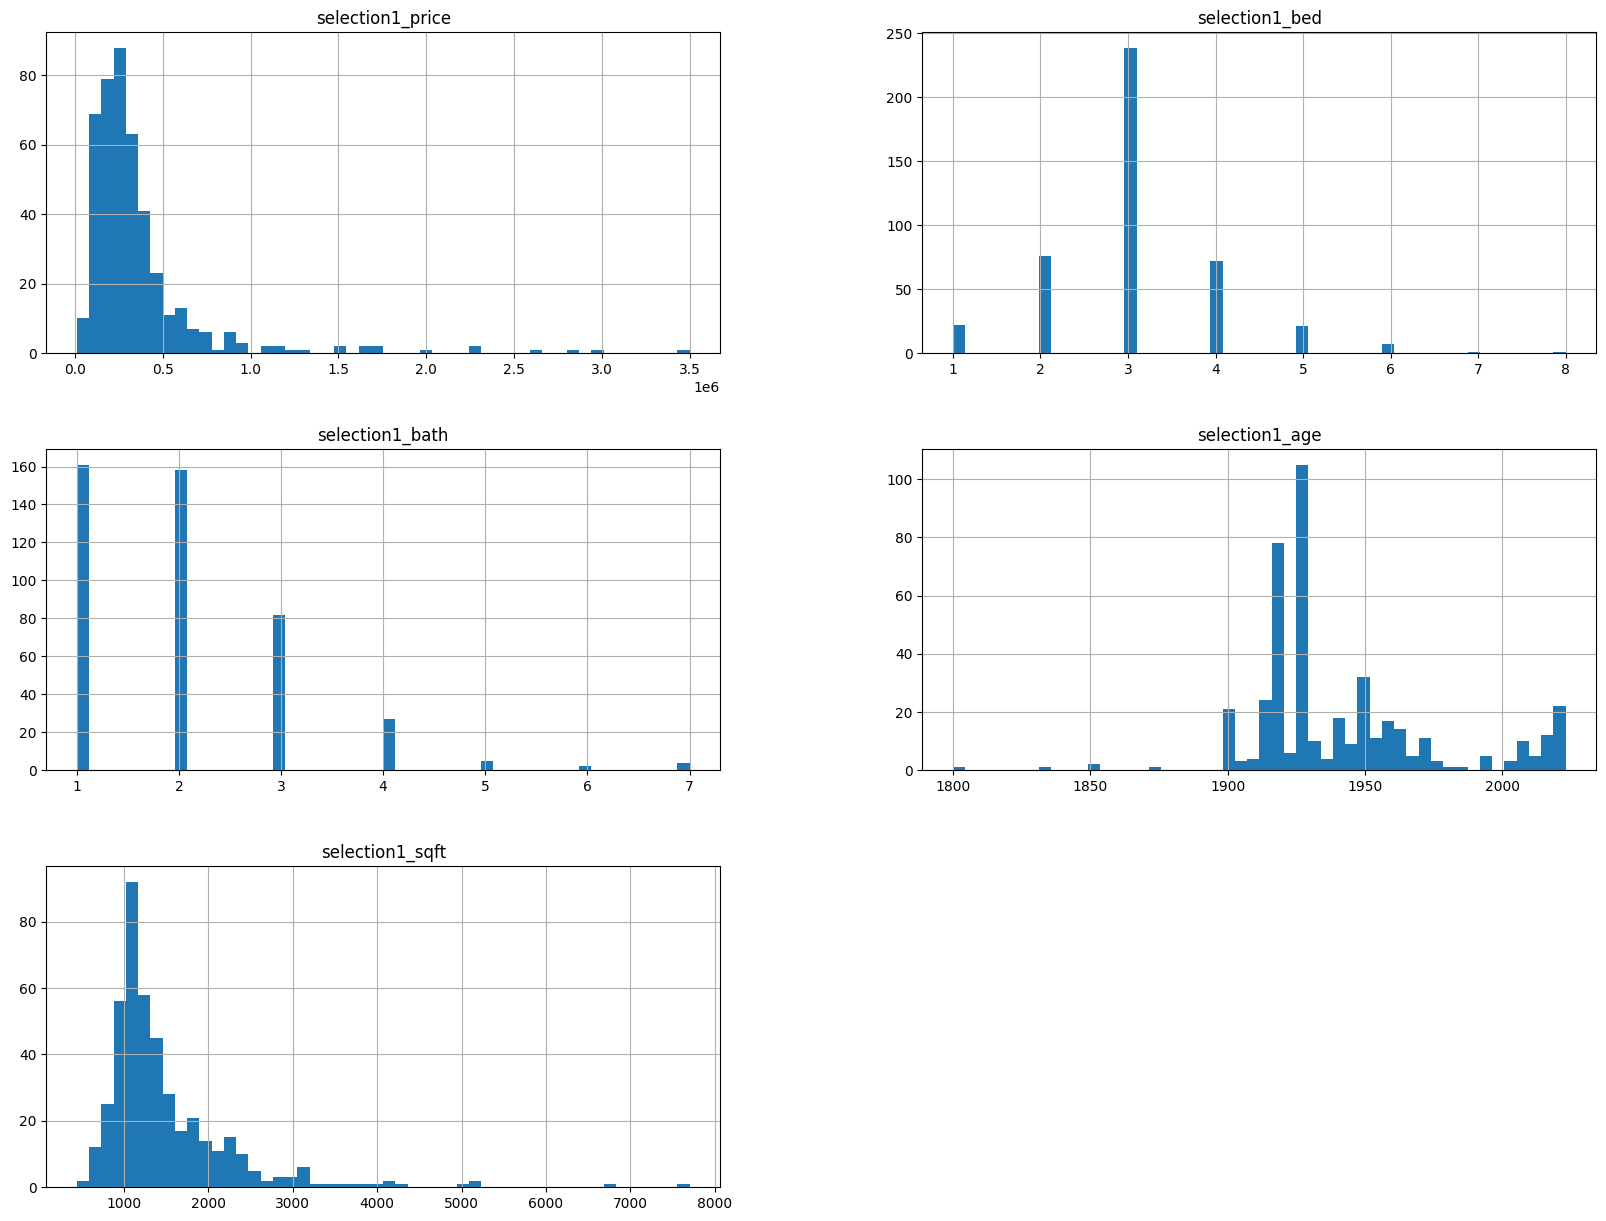

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [4]:
housing = housing[["selection1_price","selection1_bed","selection1_bath","selection1_age","selection1_sqft"]]

In [5]:
corr_matrix = housing.corr()
corr_matrix["selection1_price"].sort_values(ascending=False)

selection1_price    1.000000
selection1_sqft     0.773857
selection1_bath     0.705214
selection1_age      0.338450
selection1_bed      0.254362
Name: selection1_price, dtype: float64

array([[<Axes: xlabel='selection1_price', ylabel='selection1_price'>,
        <Axes: xlabel='selection1_bed', ylabel='selection1_price'>,
        <Axes: xlabel='selection1_bath', ylabel='selection1_price'>,
        <Axes: xlabel='selection1_age', ylabel='selection1_price'>,
        <Axes: xlabel='selection1_sqft', ylabel='selection1_price'>],
       [<Axes: xlabel='selection1_price', ylabel='selection1_bed'>,
        <Axes: xlabel='selection1_bed', ylabel='selection1_bed'>,
        <Axes: xlabel='selection1_bath', ylabel='selection1_bed'>,
        <Axes: xlabel='selection1_age', ylabel='selection1_bed'>,
        <Axes: xlabel='selection1_sqft', ylabel='selection1_bed'>],
       [<Axes: xlabel='selection1_price', ylabel='selection1_bath'>,
        <Axes: xlabel='selection1_bed', ylabel='selection1_bath'>,
        <Axes: xlabel='selection1_bath', ylabel='selection1_bath'>,
        <Axes: xlabel='selection1_age', ylabel='selection1_bath'>,
        <Axes: xlabel='selection1_sqft', ylabel='

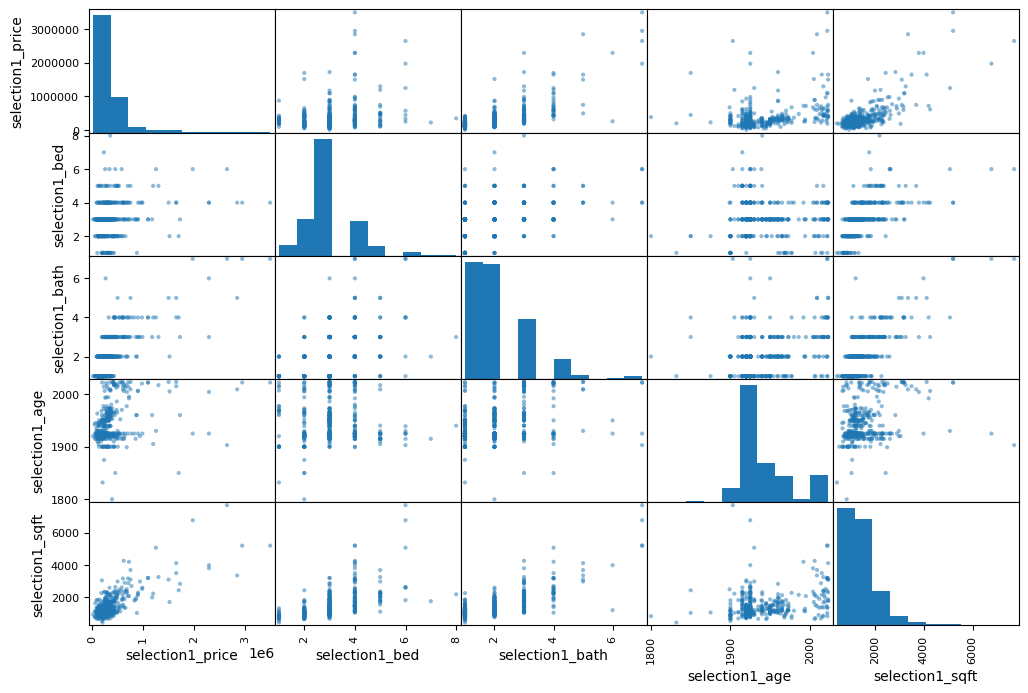

In [6]:
from pandas.plotting import scatter_matrix

attributes = ["selection1_price", "selection1_bed", "selection1_bath",
              "selection1_age", "selection1_sqft"]
scatter_matrix(housing[attributes], figsize=(12, 8))

3. Explore the data
The best features for predicting price seem to be sqft and bath. The other features have a significant dropoff in their correlation with price and probably are not as useful for making predictions

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_y = train_set["selection1_price"]
train_set = train_set[["selection1_bed", "selection1_age", "selection1_bath","selection1_sqft"]]
train_x = train_set
test_y = test_set["selection1_price"]
test_x = test_set[["selection1_bed", "selection1_age", "selection1_bath","selection1_sqft"]]
test_y = test_y.to_frame()

4. Prepare the data
Most necessary adjustments like removing , and $, dropping nan values and converting to the right types were done earlier and now training and test sets have been created.

5. Model the data
I will be using a couple different models with the data including linear regression, randomforestregressor, extratreesclassifier, and svr. I will then compare the accuracy of the models using r2_score.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x,train_y)


LinearRegression()

In [9]:
y_prediction = lr.predict(test_x)
y_prediction
from sklearn.metrics import r2_score
score=r2_score(test_y,y_prediction)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y,y_prediction)
from math import sqrt
print(sqrt(mse))
score


244073.68750684973


0.6043267810267443

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

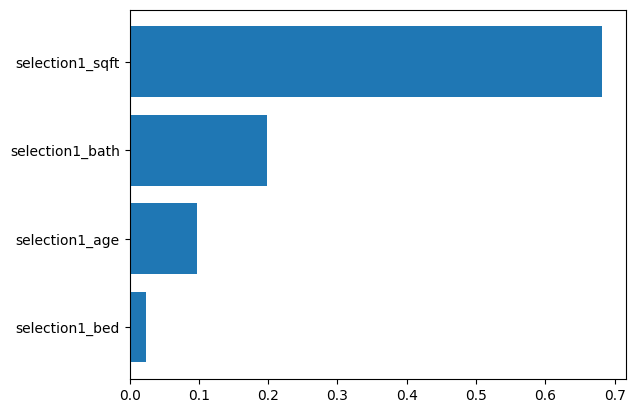

In [11]:
features = ["selection1_bed", "selection1_age","selection1_bath","selection1_sqft"]
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [12]:
y_prediction2 =rf.predict(test_x)
score2=r2_score(test_y,y_prediction2)
mse2 = mean_squared_error(test_y,y_prediction2)
print(sqrt(mse2))
score2

253365.78530152718


0.5736260478411066

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(train_x,train_y)

ExtraTreesClassifier(random_state=42)

In [14]:
y_prediction3 = etc.predict(test_x)
score3=r2_score(test_y,y_prediction3)
mse3 = mean_squared_error(test_y,y_prediction3)
print(sqrt(mse3))
score3

268665.4091101598


0.5205776906954156

In [15]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(train_x,train_y)

SVR()

In [16]:
y_prediction4 = regressor.predict(test_x)
score4=r2_score(test_y,y_prediction4)
mse4 = mean_squared_error(test_y,y_prediction4)
print(sqrt(mse4))
score4

391521.02339442156


-0.018133917225826135

6. Fine-tune the models
After experimenting with a few models I have found that linear regression seems to be the most accurate with a score of about 60% and rmse of 244,000

In [17]:
actualprices = test_y["selection1_price"].to_numpy()
d = {'predictions': y_prediction, 'prices': actualprices}
df = pd.DataFrame(data=d)
df

,predictions,prices
0,363725.562198,134900
1,221993.667813,120000
2,134126.040463,239990
3,202323.788775,120000
4,92197.163563,265000
...,...,...
83,145396.606561,129900
84,593419.634250,425000
85,216899.160814,189900
86,97232.869141,165000


7. Present the Solution
Linear Regression seems to be the most effective of the models used to predict housing prices using the given features in Philadelphia and above are the actual prices of some houses in the area compared to the predicted prices of said houses.

In [18]:
import pickle
pickle.dump(lr, open('lrmodel.pkl','wb'))   

In [19]:
def predictor(sqft:int, age:int, bed:int, bath:int):
    d = {'selection1_bed': [bed], 'selection1_age': [age], 'selection1_bath' : [bath], 'selection1_sqft': [sqft]}
    df = pd.DataFrame(d)
    model = pickle.load(open('lrmodel.pkl','rb'))
    price_prediction = model.predict(df)
    return price_prediction[0]
predictor(1520, 1915, 3, 2)


363725.56219819305

8.  Launch ML system
This function takes input for the features # of bed, sqft, age, and # of bath and uses them to predict the price of a house using the fitted linear regression model.